## Tutorial 1: Getting Started with TinyQsim

### Introduction

This Getting Started tutorial provides a quick introduction to TinyQsim through the use of a simple example.

TinyQsim is a quantum circuit simulator based on the quantum gate model. A 20-qubit Quantum Fourier Transform (QFT) takes about one second (running on a Mac Mini M2 Pro). The software is capable of simulating quantum circuits up to a maximum of 26 qubits, although this may take a couple of minutes, depending on the quantum circuit and computer.

TinyQsim is a Python library that is intended to be called from a Jupyter notebook. Notebooks provide a nice environment for experimenting with quantum algorithms and documenting them since they can contain executable code, together with its graphical output, as well as documentation including equations in LaTeX.

### Installation

TinyQsim can be downloaded from [https://github.com/jbrumf/tinyqsim](https://github.com/jbrumf/tinyqsim)

For installation instructions, see the README.md file in the source distribution.

### Documentation

Once the software is downloaded, see the documentation at:

- [https://jbrumf.github.io/tinyqsim/](https://jbrumf.github.io/tinyqsim/)

This includes the following tutorials, as well as some more advanced examples and full API documentation. 

- Tutorial 1 (this tutorial) is a Getting Started guide that provides a quick overview.
- Tutorial 2 looks at the features of TinyQsim in more detail.
- Tutorial 3 describes all the gates available as well as custom gates.
- Tutorial 4 describes the low-level API, which is not normally needed

### A Simple Example

The first step is to import the QCircuit class:

In [1]:
from tinyqsim.qcircuit import QCircuit

For the example, we will create a 2-qubit quantum circuit 'qc' that creates an entangled state:

In [2]:
qc = QCircuit(2)

The state is initialized to $\ket{00}$ by default, which we can confirm by printing it. The coefficient '1' is the associated complex amplitude.

In [3]:
qc.display_state()

<IPython.core.display.Math object>

Next, we will add some quantum gates:

In [4]:
qc.x(1)  # Add an X gate on qubit 1
qc.h(0)  # Add an H gate on qubit 0
qc.cx(0, 1)  # Add a CX gate on qubits 0 and 1

Then we can draw the circuit:

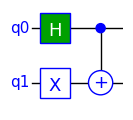

In [5]:
qc.draw()

By default, the gates are executed as they are added to the circuit, so there is no need to run the simulator explicitly and we can print the state at any time.

The various symbols and gates in the circuit diagram are explained in tutorial 3. This example has a Hadamard (H) gate, a NOT (X) gate and controlled-NOT (CX) gate. It creates the following entangled state:

$\ket{\psi}=\frac{1}{\sqrt{2}}\ket{01} + \frac{1}{\sqrt{2}}\ket{10}$

We can confirm this by displaying the state:

In [6]:
qc.display_state()

<IPython.core.display.Math object>

The 'display_state' method displays the state using LaTeX for use in a Jupyter notebook. A LaTeX prefix can be included if required. For example:

In [7]:
qc.display_state(prefix=r'\ket{\psi} = ')

<IPython.core.display.Math object>

The format may be customised in various ways as shown in the following examples:

In [8]:
qc.display_state(decimals=4, include_zeros=False, trim=True)
qc.display_state(decimals=4, include_zeros=True, trim=True)
qc.display_state(decimals=4, include_zeros=True, trim=False)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

It is also possible to format the state as plain text using 'format_state' instead of 'display_state'. This is useful when using TinyQsim from a Python script instead of from a Jupyter notebook.

In [9]:
print(qc.format_state())

0.70711|01⟩ + 0.70711|10⟩


Once the output is longer than a few lines, the 'sum-of-kets' notation becomes hard to read. It is then better to display the results as a table, using the 'table' option (This option is not currently supported by 'display_state').

In [10]:
print(qc.format_state('table', include_zeros=True))

|00⟩  0
|01⟩  0.70711
|10⟩  0.70711
|11⟩  0


The raw state vector is available from the 'state_vector' property as a numpy array:

In [11]:
qc.state_vector

array([0.        , 0.70710678, 0.70710678, 0.        ])

### Probabilities

The probabilities of different measurement outcomes are the squares of the absolute values of the amplitudes of the state components:

In [12]:
qc.probability_array()

array([0. , 0.5, 0.5, 0. ])

It is convenient to display the probabilities along with the ket labels of the associated basis states using the 'format_probabilities' method. This method should be called in a 'print' statement to ensure proper formatting. 

In [13]:
print(qc.format_probabilities())

|01⟩  0.5
|10⟩  0.5


Various formatting options may be specified. For example:

In [14]:
print(qc.format_probabilities(decimals=3, include_zeros=True, trim=False))

|00⟩  0.000
|01⟩  0.500
|10⟩  0.500
|11⟩  0.000


The probability distribution can be plotted as follows:

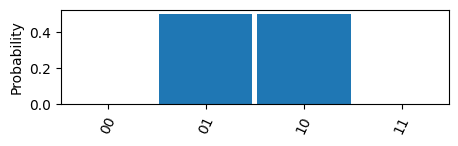

In [15]:
qc.plot_probabilities()

The 'format_probabilities' and 'plot_probabilities' methods are intended for use with circuits that do *not* contain any measurement operations, since these would collapse the state. The probabilities tell us the probabilities of different outcomes if we were to perform a measurement, but it does not perform a measurement so there is no collapse.

### Measurements

A real quantum computer does not allow us to see the quantum state. Measuring the state causes it to collapse to one of the basis states according to the probabilities shown above. If we want to estimate the probabilities on a quantum computer, we have to run the circuit many times and look at the frequency of different outcomes.

With a simulator, we have the advantage that we have access to the state and can directly calculate the probabilities of different measurement outcomes without actually performing a measurement. This provides a useful performance improvement when we don't actually need measurements.

We can simulate this probabilistic outcome using the 'counts' or 'plot_counts' methods. For example:

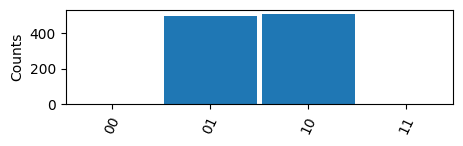

In [16]:
qc.plot_counts(runs=1000)

In [17]:
qc.counts(runs=1000)

{'01': 488, '10': 512}

If we call 'counts' or 'plot_counts' again, it simulates another 1000 runs, so the counts are likely to be different:

In [18]:
qc.counts(runs=1000)

{'01': 465, '10': 535}

The default mode of 'counts' is to resample the probability distribution from a single run. This is suitable when the circuit contains no measurements. This is much more efficient than running the circuit many times and can be an important consideration for circuits containing more than a few qubits.

If we want to simulate measurements that collapse the state, we must add measurement operations to the quantum circuit as follows:

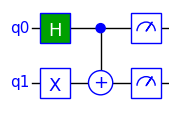

In [19]:
qc.measure()
qc.draw()

If we display the state after the measurements, it will have collapsed to either $\ket{01}$ or $\ket{10}$:

In [20]:
qc.display_state()

<IPython.core.display.Math object>

The 'counts' or 'plot_counts' methods can be called using the 'repeat' or 'measure' mode so that they actually run the circuit many times to generate measurement counts, rather than just resampling the output state of a single run. The difference between 'repeat' and 'measure' is discussed in the next tutorial. For this simple example, either can be used.

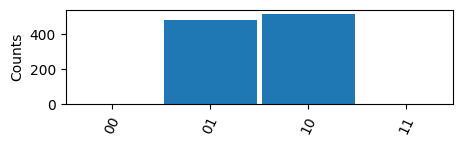

In [21]:
qc.plot_counts(mode='measure', runs=1000)

### Unitary Matrix

Individual quantum gates implement unitary operators expressed as unitary matrices. Complete circuits built from gates can also be expressed as a unitary matrix, provided that the circuit contains no measurement operations.

It is sometimes useful to obtain the unitary matrix corresponding to a circuit. The matrix can become very large if there are many qubits, so this is mostly of interest for simple circuits with a few qubits.

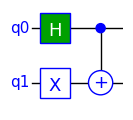

In [22]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.draw()

In [23]:
u = qc.to_unitary()
print(u)

[[ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.          0.70710678  0.        ]
 [ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]]


### Bloch Sphere

TinyQsim allows the state of a single qubit to be plotted on the Bloch sphere:

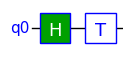

<IPython.core.display.Math object>

In [24]:
from tinyqsim.bloch import plot_bloch

qc1 = QCircuit(1)  # This must be 1 qubit
qc1.h(0)
qc1.t(0)
qc1.draw()
qc1.display_state()

The state vector is plotted in red:

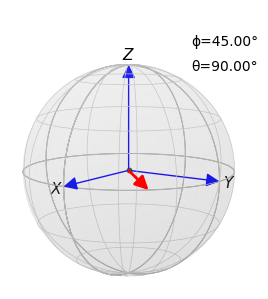

In [25]:
plot_bloch(qc1.state_vector, scale=1.0)

### Summary

This has been a quick introduction to TinyQsim. The next tutorial goes into the various features in more detail. The API documentation, particularly of the QCircuit class, provides further details of all the methods including their arguments and defaults.